In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [7]:
saved_style_state = matplotlib.rcParams.copy()

In [8]:
if os.path.isfile("bp0022-oad-pivot-2016-17-v800.csv"):
    filepath = "bp0022-oad-pivot-2016-17-v800.csv"
    print "loading from file"
immigration_data = pd.read_csv(filepath)
print "done"

loading from file
done


In [9]:
immigration_data.head(8)

,Month,Short_term_resident_departure,Short_term_resident_return,Short_term_visitor_arrival,Short_term_visitor_departure
0,July,890643,1023386,716009,643798
1,August,808434,821739,632649,695513
2,September,975137,885538,647220,588650
3,October,779397,1023834,694344,682335
4,November,734480,738837,720495,771876
5,December,1127870,676799,971802,800918
6,January,771282,1256949,725790,949600
7,February,589997,737799,780059,769797


In [10]:
if os.path.isfile("transposed.csv"):
    filepath = "transposed.csv"
    print "loading from file"
immt_data = pd.read_csv(filepath)
print "done"

loading from file
done


In [11]:
immt_data.head(10)

,Type,July,August,September,October,November,December,January,February
0,Short-term resident departure,890643,808434,975137,779397,734480,1127870,771282,589997
1,Short-term resident return,1023386,821739,885538,1023834,738837,676799,1256949,737799
2,Short-term visitor arrival,716009,632649,647220,694344,720495,971802,725790,780059
3,Short-term visitor departure,643798,695513,588650,682335,771876,800918,949600,769797


In [12]:
if os.path.isfile("RBA-FXUSD.csv"):
    filepath = "RBA-FXUSD.csv"
    print "loading from file"
rba_data = pd.read_csv(filepath)
print "done"

loading from file
done


In [13]:
rba_data.head(10)

,Month,Value
0,July,0.7460
1,August,0.7547
2,September,0.7538
3,October,0.7672
4,November,0.7680
5,December,0.7408
6,January,0.7234
7,February,0.7566


In [14]:
rbaimm_data = pd.merge(immigration_data, rba_data)
rbaimm_data.head(10)

,Month,Short_term_resident_departure,Short_term_resident_return,Short_term_visitor_arrival,Short_term_visitor_departure,Value
0,July,890643,1023386,716009,643798,0.7460
1,August,808434,821739,632649,695513,0.7547
2,September,975137,885538,647220,588650,0.7538
3,October,779397,1023834,694344,682335,0.7672
4,November,734480,738837,720495,771876,0.7680
5,December,1127870,676799,971802,800918,0.7408
6,January,771282,1256949,725790,949600,0.7234
7,February,589997,737799,780059,769797,0.7566


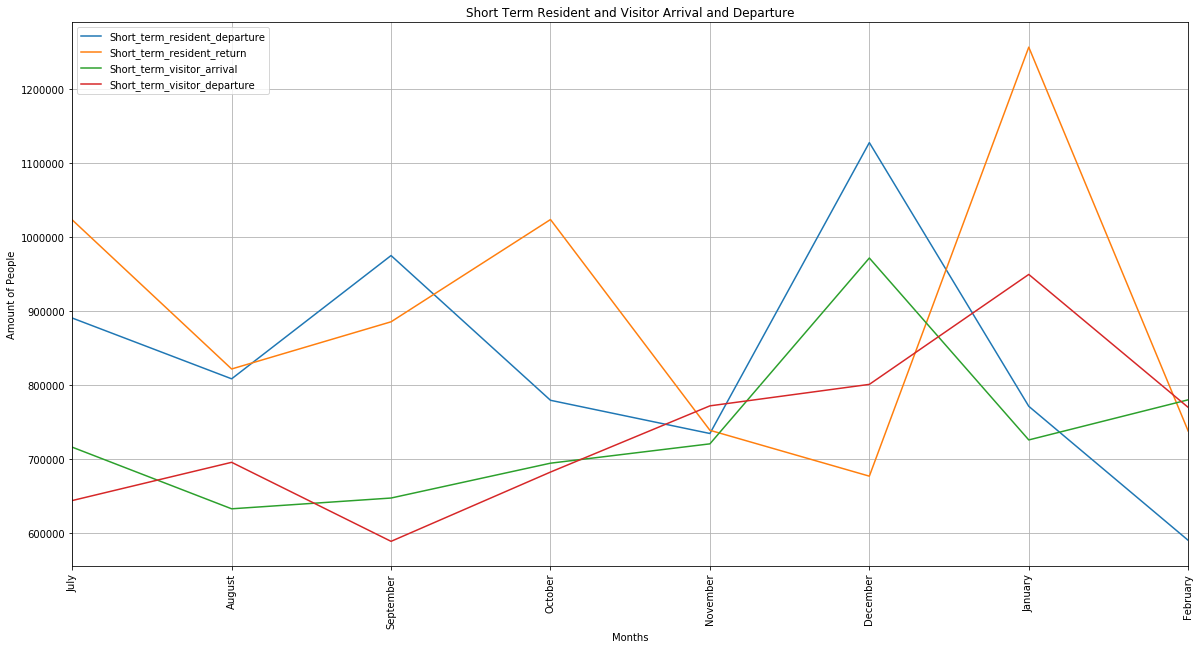

In [15]:
allimm = immigration_data.plot(xticks=immigration_data.index, rot=90)
allimm.set_xticklabels(immigration_data.Month)

plt.xlabel('Months')
plt.ylabel('Amount of People')
plt.title('Short Term Resident and Visitor Arrival and Departure')
plt.grid(True)

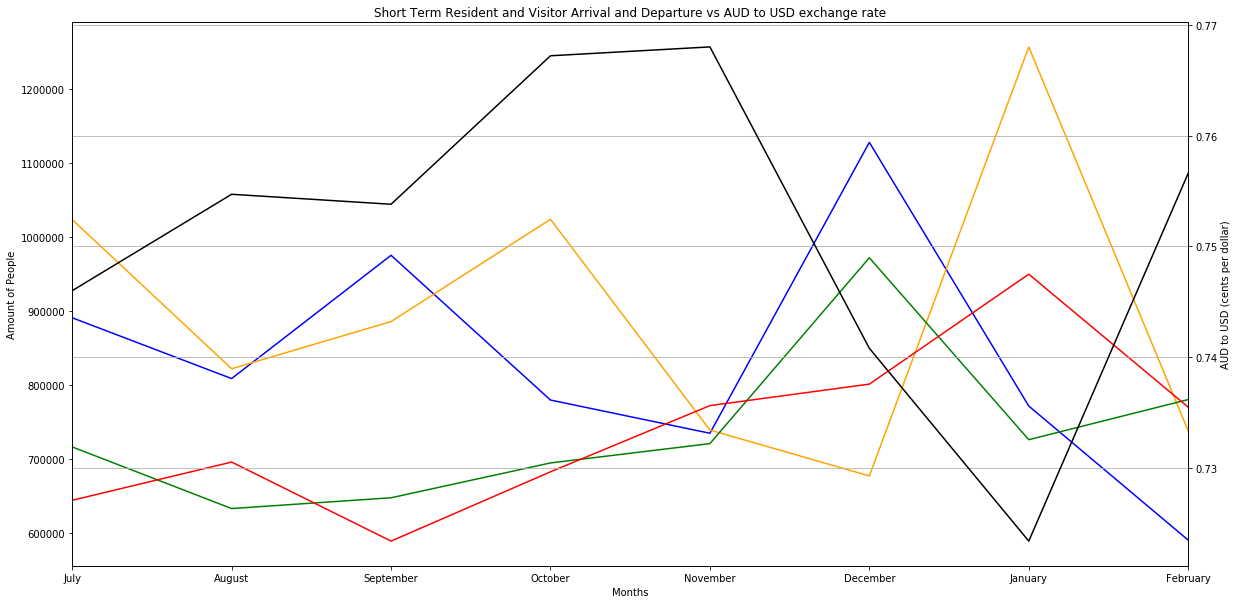

In [16]:
df = pd.DataFrame(rbaimm_data)
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.set_xticklabels(immigration_data.Month)
ax.set_xlabel('Months')
ax.set_ylabel('Amount of People')
ax2.set_ylabel('AUD to USD (cents per dollar)')
plt.title('Short Term Resident and Visitor Arrival and Departure vs AUD to USD exchange rate')
df['Value'].plot(kind='line', color='black', ax=ax2)
df['Short_term_resident_departure'].plot(kind='line', color='blue', ax=ax)
df['Short_term_resident_return'].plot(kind='line', color='orange', ax=ax)
df['Short_term_visitor_arrival'].plot(kind='line', color='green', ax=ax)
df['Short_term_visitor_departure'].plot(kind='line', color='red', ax=ax)
plt.grid(True)
plt.show()

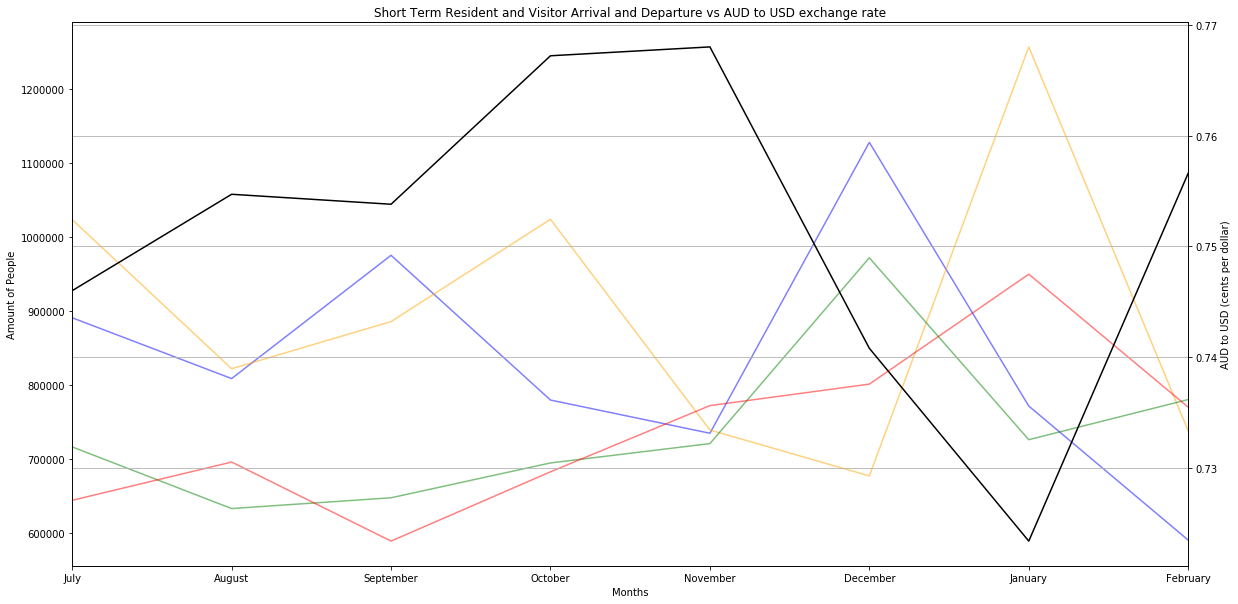

In [17]:
df = pd.DataFrame(rbaimm_data)
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.set_xticklabels(immigration_data.Month)
ax.set_xlabel('Months')
ax.set_ylabel('Amount of People')
ax2.set_ylabel('AUD to USD (cents per dollar)')
plt.title('Short Term Resident and Visitor Arrival and Departure vs AUD to USD exchange rate')
df['Value'].plot(kind='line', color='black', ax=ax2)
df['Short_term_resident_departure'].plot(kind='line', color='blue', ax=ax, alpha=0.5)
df['Short_term_resident_return'].plot(kind='line', color='orange', ax=ax, alpha=0.5)
df['Short_term_visitor_arrival'].plot(kind='line', color='green', ax=ax, alpha=0.5)
df['Short_term_visitor_departure'].plot(kind='line', color='red', ax=ax, alpha=0.5)
plt.grid(True)
plt.show()

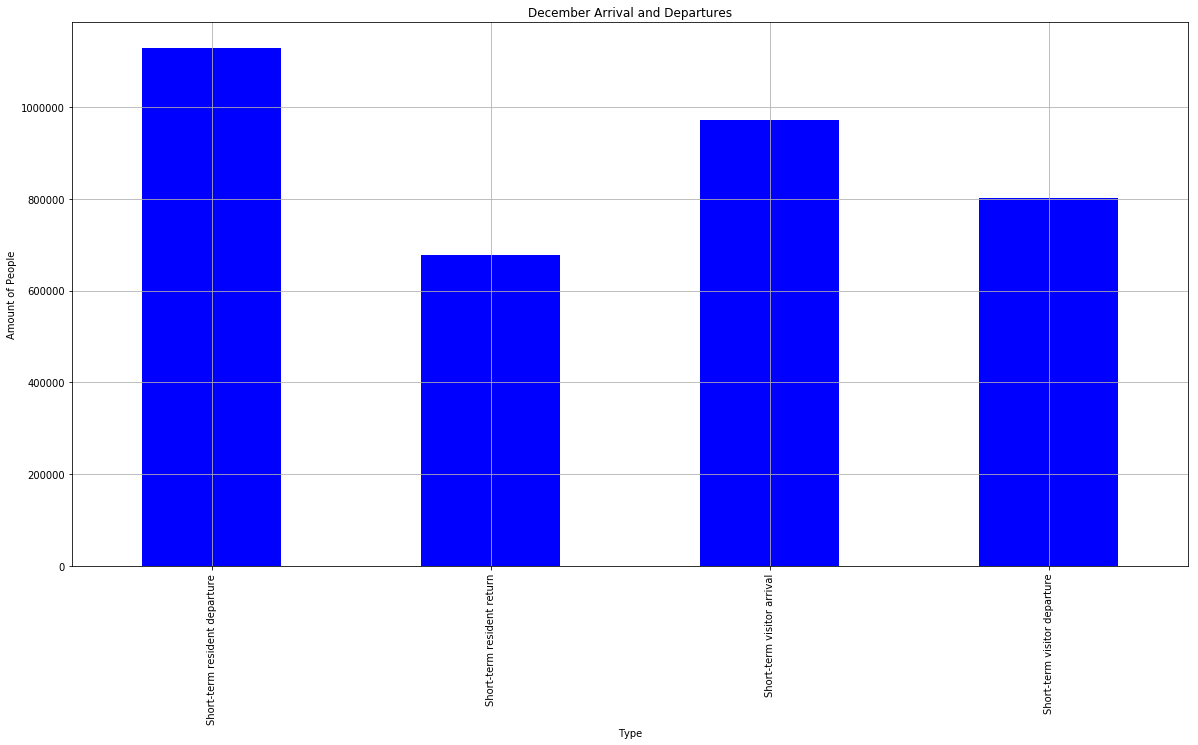

In [18]:
allimm = immt_data['December'].plot(xticks=immigration_data.index, kind = 'bar', color = 'blue')
allimm.set_xticklabels(immt_data.Type)

plt.xlabel('Type')
plt.ylabel('Amount of People')
plt.title('December Arrival and Departures')
plt.grid(True)

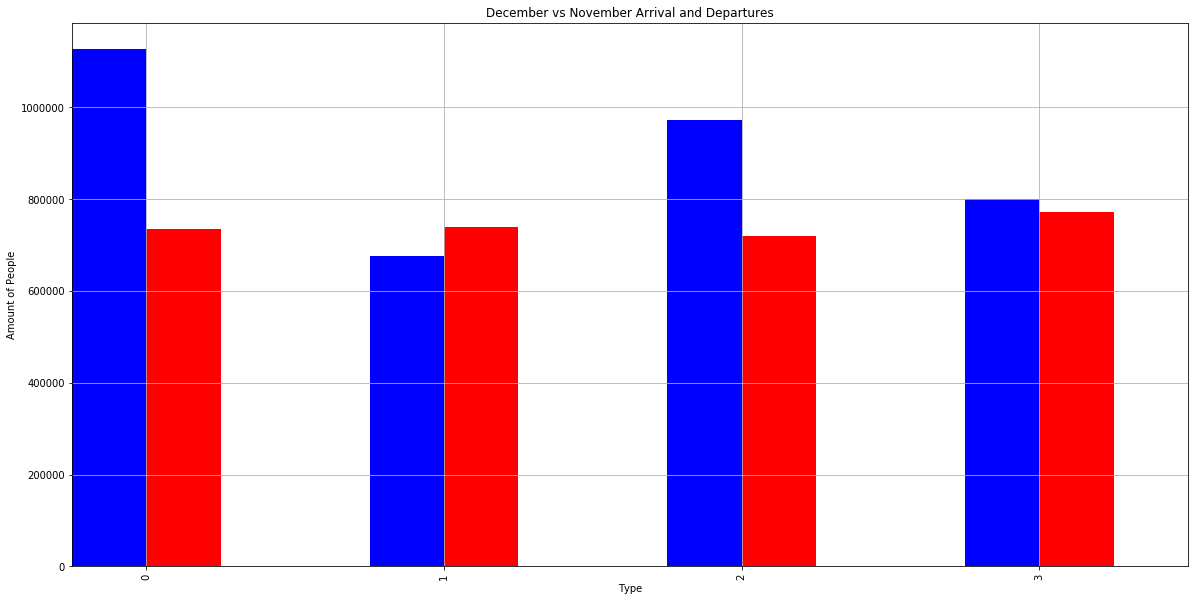

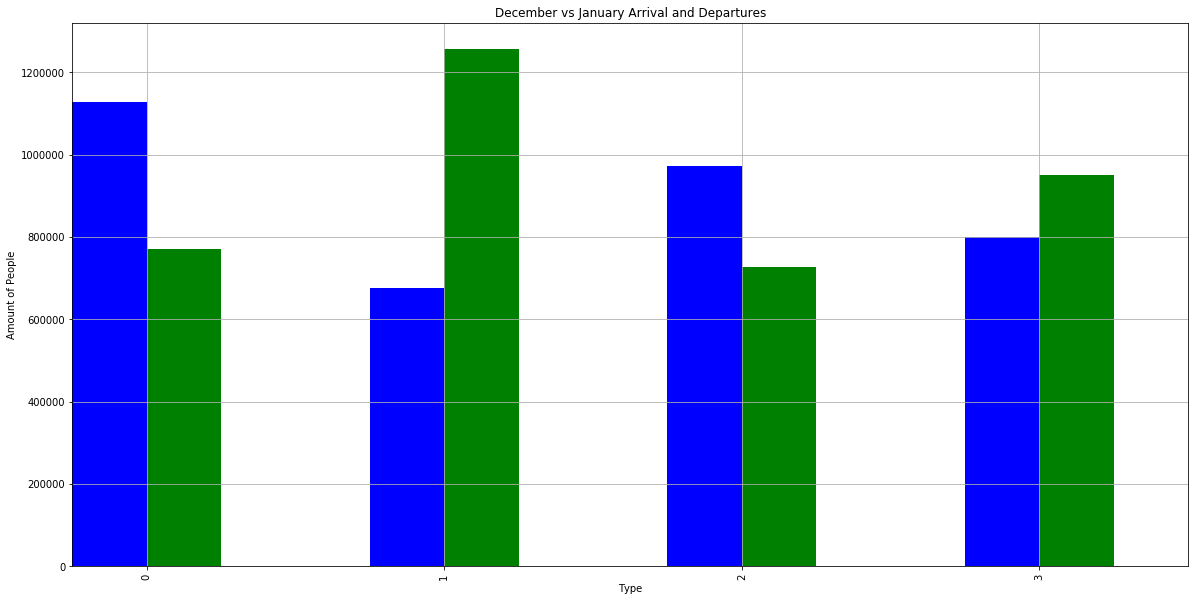

In [19]:
df = pd.DataFrame(immt_data)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xticklabels(immt_data.Type)
ax.set_xlabel('Type')
ax.set_ylabel('Amount of People')
plt.title('December vs November Arrival and Departures')
df['December'].plot(kind='bar', color='blue', ax=ax, position=1, width=0.25)
df['November'].plot(kind='bar', color='red', ax=ax, position=0, width=0.25)
plt.grid(True)
plt.show()

df = pd.DataFrame(immt_data)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xticklabels(immt_data.Type)
ax.set_xlabel('Type')
ax.set_ylabel('Amount of People')
plt.title('December vs January Arrival and Departures')
df['December'].plot(kind='bar', color='blue', ax=ax, position=1, width=0.25)
df['January'].plot(kind='bar', color='green', ax=ax, position=0, width=0.25)
plt.grid(True)
plt.show()

In [20]:
if os.path.isfile("2016STRD.csv"):
    filepath = "2016STRD.csv"
    print "loading from file"
strd_data = pd.read_csv(filepath)
print "done"

loading from file
done


In [21]:
strd_data.head(10)

,Country,Departing_Residents_2016,Departing_Residents_2006
0,New Zealand,1315600,860000
1,Indonesia,1248000,193100
2,United States of America,1053400,441400
3,"UK, CIs & IOM(a)",587600,422600
4,Thailand,528600,288200
5,China,451400,249900
6,Singapore,377100,195900
7,Japan,362500,99000
8,Fiji,344700,201000
9,India,319400,106700


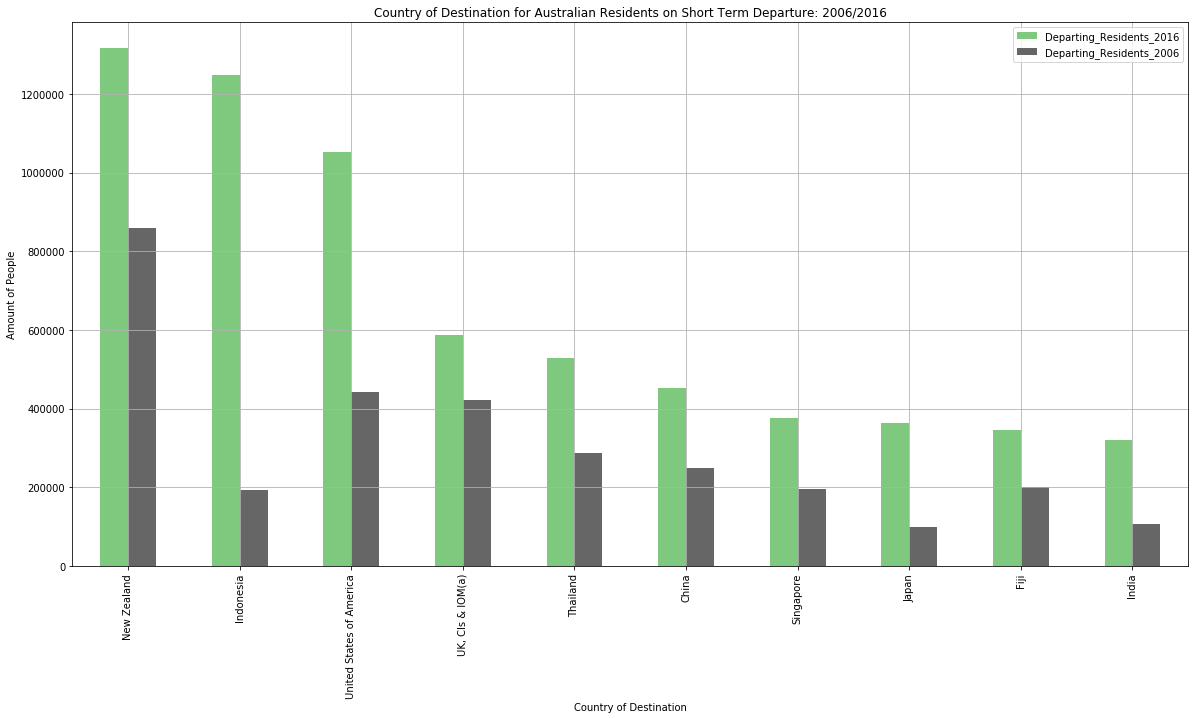

In [40]:
allimm = strd_data.plot(xticks=strd_data.index, rot=90, kind = 'bar', colormap = 'Accent')
allimm.set_xticklabels(strd_data.Country)
    
plt.xlabel('Country of Destination')
plt.ylabel('Amount of People')
plt.title('Country of Destination for Australian Residents on Short Term Departure: 2006/2016')
plt.grid(True)

In [23]:
if os.path.isfile("ABS-WPA.csv"):
    filepath = "ABS-WPA.csv"
    print "loading from file"
ABSWPA_data = pd.read_csv(filepath)
print "done"

loading from file
done


In [24]:
ABSWPA_data.head(3)

,Year,Weekly_Pay_Average
0,2016,1 592.40
1,2006,1 105.10


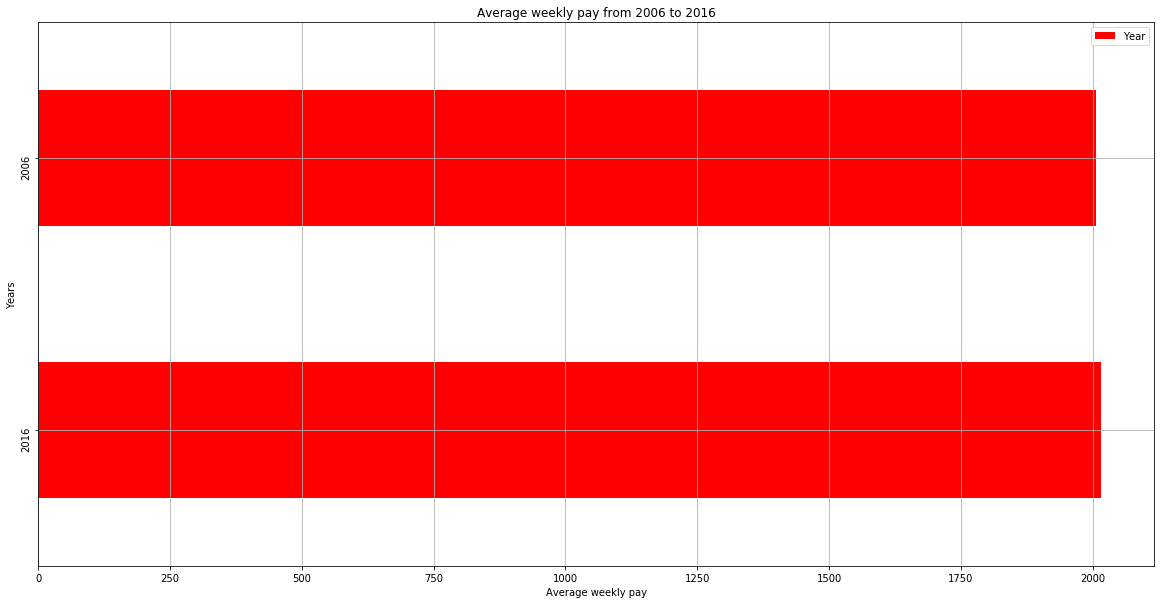

In [54]:
allimm = ABSWPA_data.plot(yticks=ABSWPA_data.index, rot=90, kind = 'barh', colormap = 'flag')
allimm.set_yticklabels(ABSWPA_data.Year)

plt.xlabel('Average weekly pay')
plt.ylabel('Years')
plt.title('Average weekly pay from 2006 to 2016')
plt.grid(True)